## Observations and Insights 

In [1]:
# Observations and Insights
#
# 1. Looking at the boxplot (Tumor Volume (mm3) by Treatment for Mice) results one can infer that Capomulin and Ramicane 
#    are more effective treatments on the mice than Infubinol and Ceftamin. As you can see from the boxplots the means 
#    of the tumor sizes for Capomulin and Ramicane are much less than the size of the Infubinol and Ceftamin means. 
#
# 2. The statement in #1 above is further supported by analysis in the line plot (Tumor Volume (mm3) vs. Timepoint 
#    for mouse (mouse-x) treated with (treatment-y)) as I plotted (my code is configurable for treatment and mouse) 
#    each mouse across treatments and found that in most all cases tumor sizes reduced over time for Capomulin and 
#    Ramicane versus a steady increase of tumor size for Infubinol and Ceftamin.
#
# 3. Finally for the scatter plot (Average Tumor Volume (mm3) vs. Mouse Weight (g) for the (treatment-y)) it shows for
#    mice a correlation between weight and size of the tumor, meaning the higher the weight of the mouse the larger the 
#    tumor for both Capomulin and Ramicane.  The same cannot be said for Infubinol and Ceftamin, no correlation was 
#    found when I ran them through the scatter plot and correlation/regression calculations.
#
# 4. Based upon this mini-analysis, if I were a patient with Squamous Cell Carcinoma (SCC), I would definetly want to be
#    treated with Capomulin or Ramicane.  The data shows these two treatments are more effective on the mice (and 
#    hopefully the same would apply to humans).  However, as a doctor, I might warn a patient that if you are overweight 
#    data suggests that tumor sizes may be bigger.
#
#

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
unique_mouse_count = len(mouse_study_results["Mouse ID"].unique())
unique_mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find any duplicated mice, in this case we found one duplicated by ID and Timepoint
duplicated_mice = mouse_study_results[mouse_study_results.duplicated(['Mouse ID', 'Timepoint'])]
dupicated_mice_id = duplicated_mice["Mouse ID"].unique()
dupicated_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

# Showing the offending mouse
mouse_study_results[mouse_study_results["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Removing offending mouse, creating another dataframe
clean_mouse_study_results = mouse_study_results.loc[mouse_study_results["Mouse ID"] != "g989",:]
clean_mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

# Get unique number of mice after removing the bogus repeating mouse (notice it is one less than original data)
unique_clean_mouse_study_count = clean_mouse_study_results["Mouse ID"].unique()
len(unique_clean_mouse_study_count)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Going to use tumor value later to setup multi-index to make it look like the agg() function output below
tumor_volume = "Tumor Volume (mm3)"

# Build the series
drug_regimen_mean = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].mean()
drug_regimen_median = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].median()
drug_regimen_variance = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].var()
drug_regimen_stddev = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].std()
drug_regimen_sem = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].sem()

# Create the dataframe
summary_stats_table_1 = pd.DataFrame({
    "mean" : drug_regimen_mean,
    "median" : drug_regimen_median,
    "var": drug_regimen_variance,
    "std": drug_regimen_stddev,
    "sem": drug_regimen_sem,
})

# Create the multi-index, once again to mirror the output of the agg() function below
mIdxcols = pd.MultiIndex.from_tuples([(tumor_volume,'mean'),(tumor_volume,'median'),(tumor_volume,'var'),(tumor_volume,'std'),(tumor_volume,'sem')])
summary_stats_table_1.columns = mIdxcols

summary_stats_table_1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Use single line aggregation to produce the summary (it is a single line just formatted for easier reading)
summary_stats_table_2 = clean_mouse_study_results.groupby("Drug Regimen").agg({
        "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"], 
    }
)
summary_stats_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

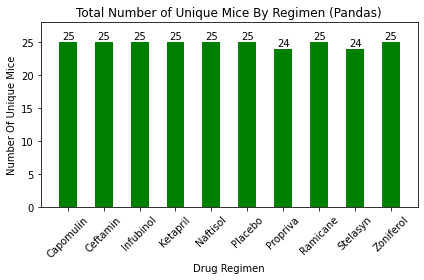

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get unique mice by drug regimen
unique_mice_by_regimen = clean_mouse_study_results.groupby("Drug Regimen")["Mouse ID"].nunique()

# Plot bar chart using Pandas save off the axis so I can annotate
ax = unique_mice_by_regimen.plot(kind="bar", color="green", alpha=1.0, width=0.5)

# Enumerate through the list mice by region and add annotations
for i, x in enumerate(unique_mice_by_regimen):
    ax.annotate(x, (i, x), xytext=(-6,3), textcoords='offset points')

# Ticks were already there but I want them at a 45 degree angle    
x_ticks = unique_mice_by_regimen.index.values
x_axis = np.arange(len(x_ticks))
ax.set_xticks(x_axis)
ax.set_xticklabels(x_ticks, rotation=45)

# Various other tweeks to make the graph look better
ax.set_title("Total Number of Unique Mice By Regimen (Pandas)")
ax.set_ylabel("Number Of Unique Mice")
ax.set_ylim(0, max(unique_mice_by_regimen)+3)
ax.set_xlim(-0.75, len(unique_mice_by_regimen)-0.25)

# Show the graph
plt.tight_layout()
plt.savefig("images/bar_chart_pandas.png")
plt.show()

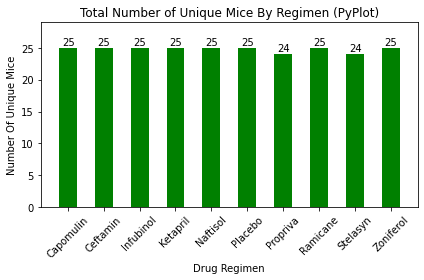

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create a subplot so I can add annotations to the pyplot
fig, ax = plt.subplots()
ax.bar(x_axis, unique_mice_by_regimen, color='g', width = 0.5, alpha=1.0, align="center")

#Enumerate through the list mice by region and add annotations
for i, x in enumerate(unique_mice_by_regimen):
    ax.annotate(x, (i, x), xytext=(-6,3), textcoords='offset points')

# Setup ticks at a 45 degree angle    
x_ticks = unique_mice_by_regimen.index.values
x_axis = np.arange(len(x_ticks))
ax.set_xticks(x_axis)
ax.set_xticklabels(x_ticks, rotation=45)

# Various other tweeks to make the graph look better
ax.set_title("Total Number of Unique Mice By Regimen (PyPlot)")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number Of Unique Mice")
ax.set_ylim(0, max(unique_mice_by_regimen)+4)
ax.set_xlim(-0.75, len(unique_mice_by_regimen)-0.25)

# Show the graph
plt.tight_layout()
plt.savefig("images/bar_chart_pyplot.png")
plt.show()

In [12]:
# Get the groupby sex for unique mice
unique_mice_by_sex = clean_mouse_study_results.groupby("Sex")["Mouse ID"].nunique()
unique_mice_by_sex

colors = ['red','blue']
explode = [0.0,0.1]
labels = ["Female", "Male"]

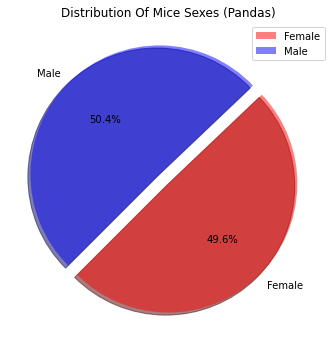

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = unique_mice_by_sex.plot(kind="pie", shadow = True, autopct='%1.1f%%', startangle=225,
                             figsize=(10,5), colors=colors, explode=explode, legend=True, 
                             title="Distribution Of Mice Sexes (Pandas)",
                             wedgeprops={'alpha':0.5})
ax.set_ylabel('')

# Show the graph
plt.tight_layout()
plt.savefig("images/pie_chart_pandas.png")
plt.show()


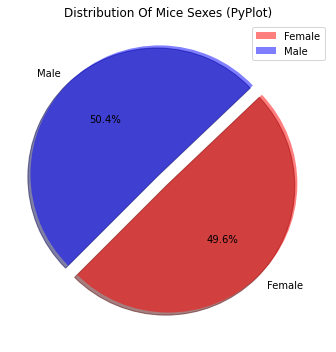

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(unique_mice_by_sex, shadow = True, autopct='%1.1f%%', startangle=225,  colors=colors, explode=explode, 
        labels=labels, wedgeprops={'alpha':0.5})
ax.set_title("Distribution Of Mice Sexes (PyPlot)")
ax.legend(labels, loc="upper right")

# Show the graph
plt.tight_layout()
plt.savefig("images/pie_chart_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gb = clean_mouse_study_results.groupby(["Mouse ID"])
max_timepoint_df = gb.agg({"Timepoint":"max"})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_last_timepoint_df = pd.merge(clean_mouse_study_results, max_timepoint_df, on=["Mouse ID", "Timepoint"])
mice_last_timepoint_df

# Filter on the 4 regimens
regimen_mice_filter_df = mice_last_timepoint_df[(mice_last_timepoint_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]
regimen_mice_filter_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = regimen_mice_filter_df["Drug Regimen"].unique()
treatment_list = [x for x in treatments]
treatment_axis = np.arange(start=1, stop=len(treatment_list)+1)  

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_data = []

# Create a dataframe to present the outliers better
column_names = [
    "Drug Regimen", 
    "lower quartile", 
    "upper quartile", 
    "interquartile range", 
    "median",
    "less than outliers",
    "greater than outliers",
    "min",
    "max",
]
potential_outliers_df = pd.DataFrame(columns = column_names)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumors = regimen_mice_filter_df.loc[ regimen_mice_filter_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    # Append this to the boxplot array to display
    tumor_volumes_data.append(tumors)
    
    tumor_max = max(tumors)
    tumor_min = min(tumors)
    
    # Calculate the quantiles and irq
    quantile = tumors.quantile([0.25,0.5,0.75])
    lower = quantile[0.25]
    upper = quantile[0.75]
    median = quantile[0.5]
    iqr = upper - lower
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)
    
    # Add to our outliers dataframe 
    new_row = {
        "Drug Regimen" : treatment, 
        "lower quartile": lower, 
        "upper quartile": upper, 
        "interquartile range": iqr, 
        "median": median,
        "less than outliers": lower_bound,
        "greater than outliers": upper_bound,
        "min" : tumor_min,
        "max": tumor_max,
    }
    potential_outliers_df = potential_outliers_df.append(new_row, ignore_index=True)

# Display outliers df
potential_outliers_df

,Drug Regimen,lower quartile,upper quartile,interquartile range,median,less than outliers,greater than outliers,min,max
0,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811,22.050126,45.220869
1,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015,23.343598,47.685963
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446,36.321346,72.226731
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458,45.000000,68.923185


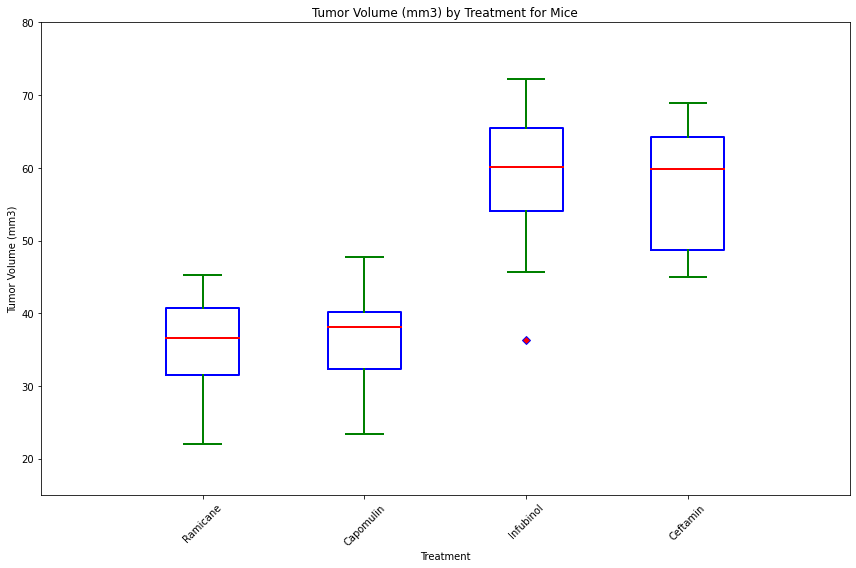

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12, 8))
bp = ax1.boxplot(tumor_volumes_data)

# Set some boxplot properties for display
plt.setp(bp['fliers'], markeredgecolor='blue', markerfacecolor="red", marker='D')
plt.setp(bp['whiskers'], color="green", linewidth=2.0)
plt.setp(bp['caps'], color="green", linewidth=2.0)
plt.setp(bp['boxes'], color="blue", linewidth=2.0)
plt.setp(bp['medians'], color="red", linewidth=2.0)

# Make it more pretty
ax1.set_xticks(treatment_axis)
ax1.set_xticklabels(treatment_list, rotation=45)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Treatment")
ax1.set_xlim(0, len(treatment_list)+1)
ax1.set_ylim(15, 80)
ax1.set_title("Tumor Volume (mm3) by Treatment for Mice")

# Show the graph
plt.tight_layout()
plt.savefig("images/boxplot_chart.png")
plt.show()


## Line and Scatter Plots


List of mice in case we want to change our mouse:
['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']

Current mouse: x401
Current Treatment: Capomulin




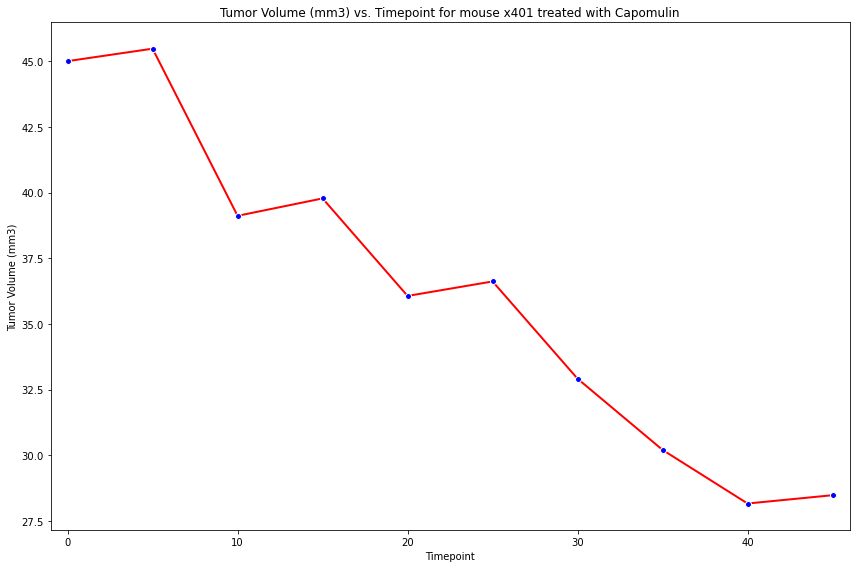

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Make these as variables in case I want change later
line_mouse_id = "x401"
line_treatment = "Capomulin"
#line_treatment = "Ramicane"
#line_treatment = "Infubinol"
#line_treatment = "Ceftamin"

# Get the treatment
line_mouse_with_treatment = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"] == line_treatment]

# Printed the list of mice in case we want to change it (will change based on treatment)
print("\nList of mice in case we want to change our mouse:")
print(line_mouse_with_treatment["Mouse ID"].unique())
print(f"\nCurrent mouse: {line_mouse_id}")
print(f"Current Treatment: {line_treatment}")
print("\n")

# Get a mouse with this treatment 
line_mouse_with_treatment = line_mouse_with_treatment[line_mouse_with_treatment["Mouse ID"] == line_mouse_id]
line_mouse_with_treatment = line_mouse_with_treatment.sort_values(by=["Timepoint"], ascending=True)
line_mouse_with_treatment

# Plot the line graph
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel("Timepoint")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Tumor Volume (mm3) vs. Timepoint for mouse " + line_mouse_id + " treated with " + line_treatment)
ax1.set_xlim(line_mouse_with_treatment["Timepoint"].min()-1, line_mouse_with_treatment["Timepoint"].max()+1)
ax1.set_ylim(line_mouse_with_treatment["Tumor Volume (mm3)"].min()-1, line_mouse_with_treatment["Tumor Volume (mm3)"].max()+1)
ax1.plot(
    line_mouse_with_treatment["Timepoint"], 
    line_mouse_with_treatment["Tumor Volume (mm3)"],      
    color="red", 
    marker="o", 
    markerfacecolor="blue", 
    markeredgecolor="white",
    linewidth=2.0
)

# Show the graph
plt.tight_layout()
plt.savefig("images/line_chart.png")
plt.show()


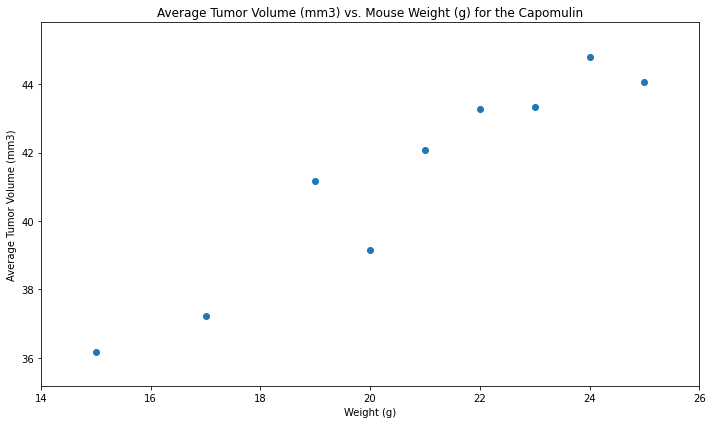

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_treatment = "Capomulin"
#scatter_treatment = "Ramicane"
#scatter_treatment = "Infubinol"
#scatter_treatment = "Ceftamin"

# Get the treatment
scatter_atv_df = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"] == scatter_treatment]

# Aggregate by weight and tumor mean
scatter_atv_by_weight_df = scatter_atv_df.groupby("Weight (g)").agg({"Tumor Volume (mm3)":"mean"})

# Reset the index so it become a column (easier to access)
scatter_atv_by_weight_df.reset_index(level=0, inplace=True)

# Plot the graph
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")
ax1.set_title("Average Tumor Volume (mm3) vs. Mouse Weight (g) for the " + scatter_treatment)
ax1.set_xlim(
    scatter_atv_by_weight_df["Weight (g)"].min() - 1, 
    scatter_atv_by_weight_df["Weight (g)"].max() + 1
)
ax1.set_ylim(
    scatter_atv_by_weight_df["Tumor Volume (mm3)"].min() - 1, 
    scatter_atv_by_weight_df["Tumor Volume (mm3)"].max() + 1)
ax1.scatter(
    scatter_atv_by_weight_df["Weight (g)"], 
    scatter_atv_by_weight_df["Tumor Volume (mm3)"]
)

# Show the graph
plt.tight_layout()
plt.savefig("images/scatter_chart.png")
plt.show()


## Correlation and Regression



Correlation: 0.9505243961855269, p_value: 8.449451040646294e-05



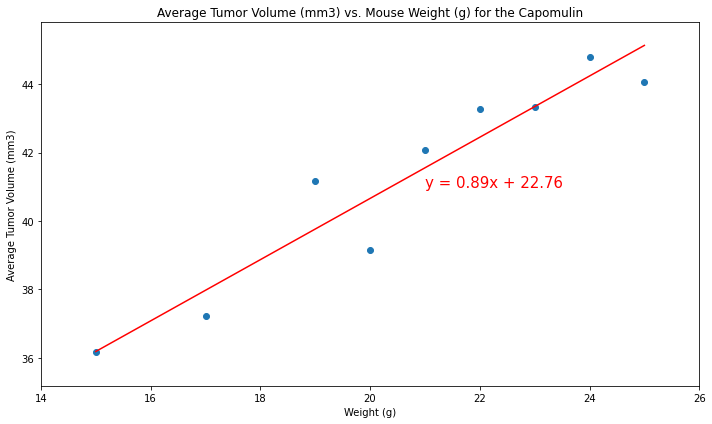

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# `correlation` tells you how strong the relationship is, between 0 and 1. `p_value`
# tells you if that relationship is statistically significant (look for values < 0.05)
correlation, p_value = st.pearsonr(scatter_atv_by_weight_df["Weight (g)"], scatter_atv_by_weight_df["Tumor Volume (mm3)"])
print("\n")
print(f"Correlation: {correlation}, p_value: {p_value}\n")

# `slope` and `intercept` allow you to draw a y = mx + b line. `rvalue` is interpreted
# as the variability in your data that is explainable by the model. `p_value` is similar 
# to above. `stderr` is a bit technical, but similar to the standard error of the mean
# we looked at previously, a smaller value is "better"
slope, intercept, rvalue, pvalue, stderr = linregress(scatter_atv_by_weight_df["Weight (g)"], scatter_atv_by_weight_df["Tumor Volume (mm3)"])

# Get the y values for the regression
regress_values = scatter_atv_by_weight_df["Weight (g)"] * slope + intercept

# Build an equation string to display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph with the regression line
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")
ax1.set_title("Average Tumor Volume (mm3) vs. Mouse Weight (g) for the " + scatter_treatment)
ax1.set_xlim(scatter_atv_by_weight_df["Weight (g)"].min()-1, scatter_atv_by_weight_df["Weight (g)"].max()+1)
ax1.set_ylim(scatter_atv_by_weight_df["Tumor Volume (mm3)"].min()-1, scatter_atv_by_weight_df["Tumor Volume (mm3)"].max()+1)
ax1.annotate(line_eq,(21,41),fontsize=15,color="red")
ax1.scatter(
    scatter_atv_by_weight_df["Weight (g)"], 
    scatter_atv_by_weight_df["Tumor Volume (mm3)"]
)
ax1.plot(
    scatter_atv_by_weight_df["Weight (g)"], 
    regress_values, 
    "r-"
)

# Show the graph
plt.tight_layout()
plt.savefig("images/scatter_linear_chart.png")
plt.show()
